In [1]:
!python -V

Python 3.8.3


In [2]:
import pandas as pd

In [3]:
import pickle

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the data for January. How many records are there?

In [6]:
df = pd.read_parquet('./fhv_tripdata_2021-01.parquet')

In [7]:
print(f'size of df: {df.shape[0]}')

size of df: 1154112


### Q2. Computing duration

In [11]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

In [15]:
print(f'Avarage duration in january: {round(df.duration.mean(),3)}')

Avarage duration in january: 19.167


### Q3. Missing values

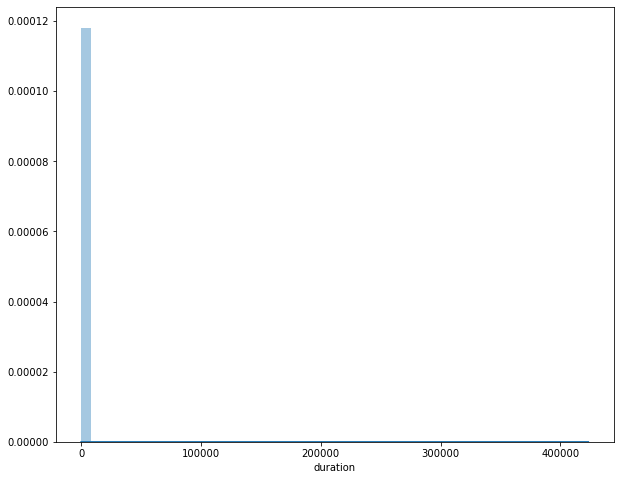

In [20]:
plt.figure(figsize=(10, 8))
sns.distplot(df.duration)

In [39]:
data = df[(df.duration >= 1) & (df.duration <= 60)]

print(f'dropped records {df.shape[0] - data.shape[0]}')

dropped records 44286


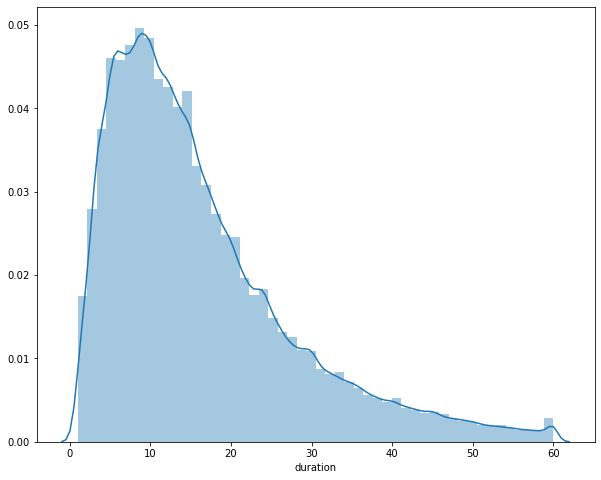

In [40]:
plt.figure(figsize=(10, 8))
sns.distplot(data.duration)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


### Q4. One-hot encoding

In [56]:
data['PUlocationID'] = data['PUlocationID'].fillna(-1)
data['DOlocationID'] = data['DOlocationID'].fillna(-1)

In [48]:
fraction_of_missed_PU = (data.PUlocationID == -1).mean() * 100
print(f'fraction_of_missed_PU : {fraction_of_missed_PU }')

fraction_of_missed_PU : 83.52732770722618


In [59]:
categorical = ['PUlocationID', 'DOlocationID']
data[categorical] = data[categorical].astype(str)

In [60]:

feature_matrix = data[categorical].to_dict(orient='records')
dv = DictVectorizer()

X_train = dv.fit_transform(feature_matrix)

In [63]:
print(f'Number of columns: {X_train.shape[1]}')

Number of columns: 525


### Q5. Training a model

In [65]:
target = 'duration'
y_train = data[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107201793

### Q6. Evaluating the model

In [67]:
df_feb = pd.read_parquet('fhv_tripdata_2021-02.parquet')
df_feb['duration'] = df_feb.dropOff_datetime - df_feb.pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda x: x.total_seconds() / 60)
data_eval = df_feb[(df.duration >= 1) & (df_feb.duration <= 60)]

data_eval['PUlocationID'] = data_eval['PUlocationID'].fillna(-1)
data_eval['DOlocationID'] = data_eval['DOlocationID'].fillna(-1)

data_eval[categorical] = data_eval[categorical].astype(str)
feature_matrix1 = data_eval[categorical].to_dict(orient='records')
X_eval = dv.transform(feature_matrix1)
y_eval = data_eval[target].values

preds = lr.predict(X_eval)

mean_squared_error(y_eval, preds, squared=False)

11.107714289041057